In [1]:
from RGCPD import core_pp

C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Not able to load in plotting modules, check installment of networkx


In [2]:
core_pp.import_ds_lazy('C:\\Users\\alicj\\Desktop\\WORK\\data\\gaza_ndj_aggr.nc')

<xarray.Dataset>
Dimensions:   (cluster: 1, time: 39)
Coordinates:
  * time      (time) datetime64[ns] 1982-01-01 1983-01-01 ... 2020-01-01
  * cluster   (cluster) int32 1
Data variables:
    rainfall  (cluster, time) float64 ...

In [3]:
from clustering import clustering_spatial

In [4]:
mask = clustering_spatial.get_spatial_ma('C:\\Users\\alicj\\Desktop\\WORK\\data\\sst_1950-2020_1_12_monthly_1.0deg.nc', [130,260,-10,90])

sorting longitude
sorting longitude


In [5]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [6]:
print(core_pp.import_ds_lazy('C:\\Users\\alicj\\Desktop\\WORK\\data\\sst_1950-2020_1_12_monthly_1.0deg.nc')[0][20])

sorting longitude
<xarray.DataArray 'sst' (longitude: 360)>
array([271.68506, 271.67535, 271.6705 , ..., 271.6268 , 271.6432 , 271.72754],
      dtype=float32)
Coordinates:
    time       datetime64[ns] 1950-01-01
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    latitude   float64 -69.5
Attributes:
    long_name:  Sea surface temperature
    units:      K


In [7]:
#kwrgs_load = {'A': [5, 5, 6], 'B': 7, 'C':9}
kwrgs_clust={'eps':[600, 400], 'aps': [810, 310]}
kwrgs_load={'one':[650, 450], 'two': [850, 350]}

In [8]:
kwrgs_loop = {k:i for k, i in kwrgs_clust.items() if type(i) == list}
[kwrgs_loop.update({k:i}) for k, i in kwrgs_load.items() if type(i) == list]

[None, None]

In [9]:
for k, i in kwrgs_load.items():
    print(type(i))
    print('k: {}'.format(k))
    print('i: {}'.format(i))

<class 'list'>
k: one
i: [650, 450]
<class 'list'>
k: two
i: [850, 350]


In [10]:
kwrgs_loop

{'eps': [600, 400], 'aps': [810, 310], 'one': [650, 450], 'two': [850, 350]}

In [11]:
xarray = core_pp.import_ds_lazy('C:\\Users\\alicj\\Desktop\\WORK\\data\\sst_1950-2020_1_12_monthly_1.0deg.nc')

sorting longitude


In [12]:
if len(kwrgs_loop) >= 1:
        new_coords = []
        # here we choose observations for the first timepoint and drop the time diemnsion
        xrclustered = xarray[0].drop('time')
        for k, list_v in kwrgs_loop.items(): # in alphabetical order
            new_coords.append(k)
            #print(dim_coords)
            dim_coords = {str(k):list_v}
            xrclustered = xrclustered.expand_dims(dim_coords).copy()

In [13]:
new_coords = [d for d in xrclustered.dims if d not in ['latitude', 'longitude']]

In [14]:
new_coords

['two', 'one', 'aps', 'eps']

In [15]:
results = []
first_loop = kwrgs_loop[new_coords[0]]
second_loop = kwrgs_loop[new_coords[1]]

In [16]:
first_loop

[850, 350]

In [17]:
second_loop

[650, 450]

In [18]:
kwrgs_loop

{'eps': [600, 400], 'aps': [810, 310], 'one': [650, 450], 'two': [850, 350]}

In [19]:
kwrgs = clustering_spatial.adjust_kwrgs(kwrgs_clust.copy(), new_coords, v1, v2)
kwrgs_l = clustering_spatial.adjust_kwrgs(kwrgs_load.copy(), new_coords, v1, v2)

NameError: name 'v1' is not defined

In [20]:
for i, v1 in enumerate(first_loop):
    for j, v2 in enumerate(second_loop):
        kwrgs = clustering_spatial.adjust_kwrgs(kwrgs_clust.copy(), new_coords, v1, v2)
        print(kwrgs)
        kwrgs_l = clustering_spatial.adjust_kwrgs(kwrgs_load.copy(), new_coords, v1, v2)
        print(f"\rclustering {new_coords[0]}: {v1}, {new_coords[1]}: {v2} ", end="")

{'eps': [600, 400], 'aps': [810, 310]}
clustering two: 850, one: 650 {'eps': [600, 400], 'aps': [810, 310]}
clustering two: 850, one: 450 {'eps': [600, 400], 'aps': [810, 310]}
clustering two: 350, one: 650 {'eps': [600, 400], 'aps': [810, 310]}
clustering two: 350, one: 450 

In [21]:
i = 0
v1 = first_loop[i]

j = 0
v2 = second_loop[j]

In [22]:
i, v1, j, v2

(0, 850, 0, 650)

In [23]:
clustering_spatial.adjust_kwrgs(kwrgs_clust.copy(), new_coords, v1, v2)

{'eps': [600, 400], 'aps': [810, 310]}

In [24]:
clustering_spatial.adjust_kwrgs(kwrgs_load.copy(), new_coords, v1, v2)

{'one': 650, 'two': 850}

In [26]:
import pandas as pd
import numpy as np
data = pd.read_csv('C:\\Users\\alicj\\Desktop\\WORK\\data\\DJF.X1982_X2020.csv')

In [27]:
data[['V1', 'V2']]

,V1,V2
0,30.225,-10.475
1,30.275,-10.475
2,30.325,-10.475
3,30.375,-10.475
4,30.425,-10.475
...,...,...
47144,32.775,-26.825
47145,32.825,-26.825
47146,32.875,-26.825
47147,32.925,-26.825


In [28]:
v1 = list(data['V1'])[:10]
v2 = list(data['V2'])[:10]

In [29]:
data.head()

,V1,V2,X1982,X1983,X1984,X1985,X1986,X1987,X1988,X1989,...,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019,X2020
0,30.225,-10.475,541,831,854,849,796,862,810,666,...,719,675,837,984,629,712,742,778,827,811
1,30.275,-10.475,560,843,877,836,813,876,826,673,...,717,660,848,989,647,712,758,779,833,828
2,30.325,-10.475,571,875,885,864,855,916,824,698,...,738,681,869,1029,665,740,778,807,853,853
3,30.375,-10.475,573,874,902,823,880,907,832,709,...,732,674,872,1027,674,739,789,808,849,862
4,30.425,-10.475,571,840,898,781,848,898,825,717,...,738,675,866,1019,672,730,782,795,841,851


In [30]:
xarray.time.size

852

In [31]:
time = np.linspace(1, 10, 10)

In [95]:
time_space_3d = xarray[0].copy()
time_space_3d

<xarray.DataArray 'sst' (latitude: 180, longitude: 360)>
array([[     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       ...,
       [271.4599, 271.4599, 271.4599, ..., 271.4599, 271.4599, 271.4599],
       [271.4599, 271.4599, 271.4599, ..., 271.4599, 271.4599, 271.4599],
       [271.4599, 271.4599, 271.4599, ..., 271.4599, 271.4599, 271.4599]],
      dtype=float32)
Coordinates:
    time       datetime64[ns] 1950-01-01
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Attributes:
    long_name:  Sea surface temperature
    units:      K

In [33]:
xrspace = time_space_3d[0].copy()

In [34]:
xrspace

<xarray.DataArray 'sst' (latitude: 180, longitude: 360)>
array([[     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       ...,
       [271.4599, 271.4599, 271.4599, ..., 271.4599, 271.4599, 271.4599],
       [271.4599, 271.4599, 271.4599, ..., 271.4599, 271.4599, 271.4599],
       [271.4599, 271.4599, 271.4599, ..., 271.4599, 271.4599, 271.4599]],
      dtype=float32)
Coordinates:
    time       datetime64[ns] 1950-01-01
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Attributes:
    long_name:  Sea surface temperature
    units:      K

In [36]:
n_space = time_space_3d.longitude.size*time_space_3d.latitude.size
#mask_1d = np.reshape( mask2d, (1, n_space))
#mask_1d = np.swapaxes(mask_1d, 1,0 )

In [37]:
n_space

64800

In [38]:
mask_2d = np.array([[1, 2], [4, 6]])
mask_2d.shape

(2, 2)

In [39]:
mask_1d = np.reshape( mask_2d, (1, 4))
mask_1d

array([[1, 2, 4, 6]])

In [40]:
mask_1d = np.swapaxes(mask_1d, 1,0 )
mask_1d

array([[1],
       [2],
       [4],
       [6]])

In [41]:
mask_space_time = np.array(np.tile(mask_1d, (1,5)), dtype=int)
mask_space_time

array([[1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [4, 4, 4, 4, 4],
       [6, 6, 6, 6, 6]])

In [42]:
output_space_time = np.array(mask_space_time[:,0].copy(), dtype=int)

In [43]:
indices_mask = np.argwhere(mask_space_time[:,0] == 1)[:,0]

In [44]:
indices_mask

array([0], dtype=int64)

In [45]:
np.argwhere(mask_space_time[:,0] == 1)

array([[0]], dtype=int64)

In [46]:
time_space_2d_all = np.reshape( time_space_3d.values,
                                   (time_space_3d.time.size, n_space) )
space_time_2d_all = np.swapaxes(time_space_2d_all, 1,0)

In [47]:
time_space_2d_all

array([[      nan,       nan,       nan, ..., 271.4599 , 271.4599 ,
        271.4599 ],
       [      nan,       nan,       nan, ..., 271.4593 , 271.4593 ,
        271.4593 ],
       [      nan,       nan,       nan, ..., 271.4605 , 271.4605 ,
        271.4605 ],
       ...,
       [      nan,       nan,       nan, ..., 271.45966, 271.45966,
        271.45966],
       [      nan,       nan,       nan, ..., 271.45966, 271.45966,
        271.45966],
       [      nan,       nan,       nan, ..., 271.46027, 271.46027,
        271.46027]], dtype=float32)

In [48]:
space_time_2d_all.shape

(64800, 852)

## testing temporal clustering functions

In [49]:
from clustering import clustering_temporal as ct

In [50]:
xarray = core_pp.import_ds_lazy('C:\\Users\\alicj\\Desktop\\WORK\\data\\sst_1950-2020_1_12_monthly_1.0deg.nc')

sorting longitude


In [80]:
xarray

<xarray.DataArray 'sst' (time: 852, latitude: 180, longitude: 360)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [271.4599 , 271.4599 , ..., 271.4599 , 271.4599 ],
        [271.4599 , 271.4599 , ..., 271.4599 , 271.4599 ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [271.4593 , 271.4593 , ..., 271.4593 , 271.4593 ],
        [271.4593 , 271.4593 , ..., 271.4593 , 271.4593 ]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [271.45966, 271.45966, ..., 271.45966, 271.45966],
        [271.45966, 271.45966, ..., 271.45966, 271.45966]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [271.46027, 271.46027, ..., 271.46027, 271.46027],
        [271.46027, 271.46027, ..., 271.46027, 271.46027]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2020-12-01
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Attributes:
    long_name:  Sea surface temperature
    units:      K

In [87]:
xarray_test = xarray.copy()

In [91]:
xarray.time

<xarray.DataArray 'time' (time: 852)>
array(['1950-01-01T00:00:00.000000000', '1950-02-01T00:00:00.000000000',
       '1950-03-01T00:00:00.000000000', ..., '2020-10-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2020-12-01

In [104]:
vals = xarray.values

In [105]:
times = xarray.time

In [51]:
mask2d = np.ones((xarray.longitude.size, xarray.latitude.size))

In [98]:
#clustering_spatial.create_vector(time_space_3d, mask2d)

.sklearn_clustering()

In [99]:
time_space_3d.shape

(180, 360)

In [106]:
xarray

<xarray.DataArray 'sst' (time: 852, latitude: 180, longitude: 360)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [271.4599 , 271.4599 , ..., 271.4599 , 271.4599 ],
        [271.4599 , 271.4599 , ..., 271.4599 , 271.4599 ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [271.4593 , 271.4593 , ..., 271.4593 , 271.4593 ],
        [271.4593 , 271.4593 , ..., 271.4593 , 271.4593 ]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [271.45966, 271.45966, ..., 271.45966, 271.45966],
        [271.45966, 271.45966, ..., 271.45966, 271.45966]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [271.46027, 271.46027, ..., 271.46027, 271.46027],
        [271.46027, 271.46027, ..., 271.46027, 271.46027]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2020-12-01
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Attributes:
    long_name:  Sea surface temperature
    units:      K

In [110]:
xarray.where(xarray.longitude <= -89.5 & xarray.latitude <= 0.5)

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [115]:
xarray[:,20,90]

<xarray.DataArray 'sst' (time: 852)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2020-12-01
    longitude  float64 90.5
    latitude   float64 -69.5
Attributes:
    long_name:  Sea surface temperature
    units:      K

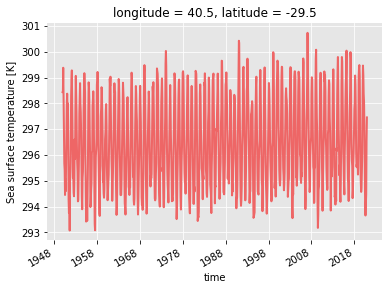

In [117]:
xarray.isel(latitude=60, longitude=40).plot()

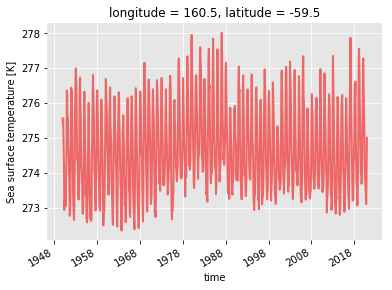

In [136]:
xarray.isel(latitude = 30, longitude = 160).plot()

In [141]:
xarray[0].values

array([[     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       ...,
       [271.4599, 271.4599, 271.4599, ..., 271.4599, 271.4599, 271.4599],
       [271.4599, 271.4599, 271.4599, ..., 271.4599, 271.4599, 271.4599],
       [271.4599, 271.4599, 271.4599, ..., 271.4599, 271.4599, 271.4599]],
      dtype=float32)